In [1]:
# import libraries
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the datasets
train= pd.read_csv(r'C:\Users\ximef\Desktop\MASTER DATA SCIENCE\KAGGLE COMPETITION\Train.csv',encoding='Latin-1')
test = pd.read_csv(r'C:\Users\ximef\Desktop\MASTER DATA SCIENCE\KAGGLE COMPETITION\Test.csv',encoding='Latin-1')

In [3]:
train.columns

Index(['Id', 'target', 'calificacion_mes00', 'calificacion_mes01',
       'calificacion_mes02', 'calificacion_mes03', 'calificacion_mes04',
       'calificacion_mes05', 'canal', 'cant_ent_deuda_consu_mes00',
       'cant_ent_deuda_consu_mes01', 'cant_ent_deuda_consu_mes02',
       'cant_ent_deuda_consu_mes03', 'cant_ent_deuda_consu_mes04',
       'cant_ent_deuda_consu_mes05', 'cant_ent_deuda_hipot_mes00',
       'cant_ent_deuda_hipot_mes01', 'cant_ent_deuda_hipot_mes02',
       'cant_ent_deuda_hipot_mes03', 'cant_ent_deuda_hipot_mes04',
       'cant_ent_deuda_hipot_mes05', 'cant_prot_no_aclarados_soles',
       'cantidad_doc_morosos', 'clase_canal', 'codigo_rubro_actividad',
       'cond_domicilio_sunat', 'deuda_dir_vig_consu_mes00',
       'deuda_dir_vig_consu_mes01', 'deuda_dir_vig_consu_mes02',
       'deuda_dir_vig_consu_mes03', 'deuda_dir_vig_consu_mes04',
       'deuda_dir_vig_consu_mes05', 'direccion_eval', 'edad',
       'esta_reportado_mes00', 'esta_reportado_mes01', 'esta_rep

In [4]:
test.columns

Index(['Id', 'calificacion_mes00', 'calificacion_mes01', 'calificacion_mes02',
       'calificacion_mes03', 'calificacion_mes04', 'calificacion_mes05',
       'canal', 'cant_ent_deuda_consu_mes00', 'cant_ent_deuda_consu_mes01',
       'cant_ent_deuda_consu_mes02', 'cant_ent_deuda_consu_mes03',
       'cant_ent_deuda_consu_mes04', 'cant_ent_deuda_consu_mes05',
       'cant_ent_deuda_hipot_mes00', 'cant_ent_deuda_hipot_mes01',
       'cant_ent_deuda_hipot_mes02', 'cant_ent_deuda_hipot_mes03',
       'cant_ent_deuda_hipot_mes04', 'cant_ent_deuda_hipot_mes05',
       'cant_prot_no_aclarados_soles', 'cantidad_doc_morosos', 'clase_canal',
       'codigo_rubro_actividad', 'cond_domicilio_sunat',
       'deuda_dir_vig_consu_mes00', 'deuda_dir_vig_consu_mes01',
       'deuda_dir_vig_consu_mes02', 'deuda_dir_vig_consu_mes03',
       'deuda_dir_vig_consu_mes04', 'deuda_dir_vig_consu_mes05',
       'direccion_eval', 'edad', 'esta_reportado_mes00',
       'esta_reportado_mes01', 'esta_reportado_mes

In [5]:
# Count of NA values per column in the train dataframe
na_counts_train = train.isna().sum()
print("NA counts in train dataframe:")
print(na_counts_train)



NA counts in train dataframe:
Id                                   0
target                               0
calificacion_mes00                   0
calificacion_mes01                   0
calificacion_mes02                   0
calificacion_mes03                   0
calificacion_mes04                   0
calificacion_mes05                   0
canal                                0
cant_ent_deuda_consu_mes00      238796
cant_ent_deuda_consu_mes01      242562
cant_ent_deuda_consu_mes02      245575
cant_ent_deuda_consu_mes03      248653
cant_ent_deuda_consu_mes04      251079
cant_ent_deuda_consu_mes05      254027
cant_ent_deuda_hipot_mes00      238796
cant_ent_deuda_hipot_mes01      242562
cant_ent_deuda_hipot_mes02      245575
cant_ent_deuda_hipot_mes03      248653
cant_ent_deuda_hipot_mes04      251079
cant_ent_deuda_hipot_mes05      254027
cant_prot_no_aclarados_soles      2461
cantidad_doc_morosos                 0
clase_canal                          0
codigo_rubro_actividad          22

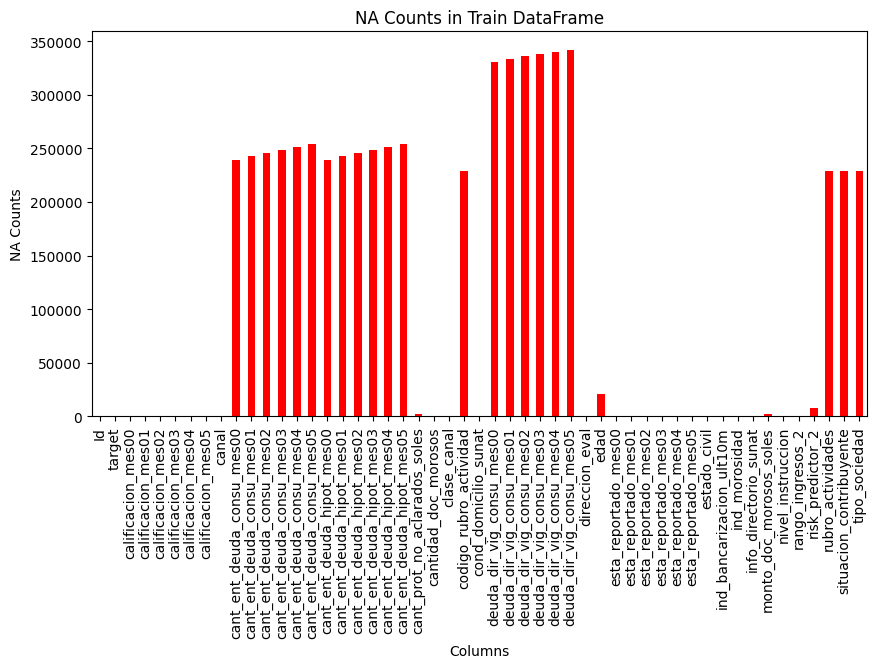

In [6]:

plt.figure(figsize=(10,5))

na_counts_train.plot(kind='bar', color='red')
plt.title('NA Counts in Train DataFrame')
plt.xlabel('Columns')
plt.ylabel('NA Counts')
plt.show()


In [7]:
# drop unuseful columns, with too many NA or useless information
train_cleaned = train.drop(['Id', 'direccion_eval', 'info_directorio_sunat', 'rubro_actividades', 'situacion_contribuyente', 'tipo_sociedad'],axis =1)
test_cleaned = test.drop(['Id', 'direccion_eval', 'info_directorio_sunat', 'rubro_actividades', 'situacion_contribuyente', 'tipo_sociedad'],axis =1)

# save the target variable
target = train_cleaned['target']
train_cleaned = train_cleaned.drop(['target'],axis = 1)


In [8]:

# Handle missing values and prepare the dataset
# For simplicity, let's fill missing values with the median for numeric features and the most frequent value for categorical features

# Define numeric and categorical features
numeric_features = train_cleaned.select_dtypes(include=[np.number]).columns.tolist() 
categorical_features = train_cleaned.select_dtypes(include=[object]).columns.tolist()

# Fill missing values for numeric features
train_cleaned[numeric_features] = train_cleaned[numeric_features].fillna(train_cleaned[numeric_features].median())
test_cleaned[numeric_features] = test_cleaned[numeric_features].fillna(test_cleaned[numeric_features].median())

# Fill missing values for categorical features
for feature in categorical_features:
	if not train_cleaned[feature].mode().empty:
		train_cleaned[feature].fillna(train_cleaned[feature].mode().iloc[0], inplace=True)
	if not test_cleaned[feature].mode().empty:
		test_cleaned[feature].fillna(test_cleaned[feature].mode().iloc[0], inplace=True)

# Encode categorical features
train_cleaned = pd.get_dummies(train_cleaned, columns=categorical_features)
test_cleaned = pd.get_dummies(test_cleaned, columns=categorical_features)

# Align the train and test dataframes by the columns
train_cleaned, test_cleaned = train_cleaned.align(test_cleaned, join='left', axis=1, fill_value=0)
# Ensure the columns in the test set match the train set
test_cleaned = test_cleaned.reindex(columns=train_cleaned.columns, fill_value=0)

C:\Users\ximef\AppData\Local\Temp\ipykernel_29648\1674438507.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cleaned[feature].fillna(train_cleaned[feature].mode().iloc[0], inplace=True)
C:\Users\ximef\AppData\Local\Temp\ipykernel_29648\1674438507.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [10]:
# feature engineering

# Add new features
train_cleaned['total_deuda_consumo_vigente'] = train_cleaned['cant_ent_deuda_consu_mes00']+train_cleaned['cant_ent_deuda_consu_mes01']+train_cleaned['cant_ent_deuda_consu_mes02']+train_cleaned['cant_ent_deuda_consu_mes03']+train_cleaned['cant_ent_deuda_consu_mes04']+train_cleaned['cant_ent_deuda_consu_mes05']
test_cleaned['total_deuda_consumo_vigente'] = test_cleaned['cant_ent_deuda_consu_mes00']+test_cleaned['cant_ent_deuda_consu_mes01']+test_cleaned['cant_ent_deuda_consu_mes02']+test_cleaned['cant_ent_deuda_consu_mes03']+test_cleaned['cant_ent_deuda_consu_mes04']+test_cleaned['cant_ent_deuda_consu_mes05']

train_cleaned['total_deuda_hipotecaria_vigente'] = train_cleaned['cant_ent_deuda_hipot_mes00']+train_cleaned['cant_ent_deuda_hipot_mes01']+train_cleaned['cant_ent_deuda_hipot_mes02']+train_cleaned['cant_ent_deuda_hipot_mes03']+train_cleaned['cant_ent_deuda_hipot_mes04']+train_cleaned['cant_ent_deuda_hipot_mes05']  
test_cleaned['total_deuda_hipotecaria_vigente'] = test_cleaned['cant_ent_deuda_hipot_mes00']+test_cleaned['cant_ent_deuda_hipot_mes01']+test_cleaned['cant_ent_deuda_hipot_mes02']+test_cleaned['cant_ent_deuda_hipot_mes03']+test_cleaned['cant_ent_deuda_hipot_mes04']+test_cleaned['cant_ent_deuda_hipot_mes05'] 

train_cleaned['total_deuda_vigente'] = train_cleaned['total_deuda_consumo_vigente']+train_cleaned['total_deuda_hipotecaria_vigente']
test_cleaned['total_deuda_vigente'] = test_cleaned['total_deuda_consumo_vigente']+test_cleaned['total_deuda_hipotecaria_vigente']



In [37]:
train_cleaned.drop(['cant_ent_deuda_consu_mes00','cant_ent_deuda_consu_mes01','cant_ent_deuda_consu_mes02','cant_ent_deuda_consu_mes03','cant_ent_deuda_consu_mes04','cant_ent_deuda_consu_mes05','cant_ent_deuda_hipot_mes00','cant_ent_deuda_hipot_mes01','cant_ent_deuda_hipot_mes02','cant_ent_deuda_hipot_mes03','cant_ent_deuda_hipot_mes04','cant_ent_deuda_hipot_mes05'],axis = 1, inplace = True)
test_cleaned.drop(['cant_ent_deuda_consu_mes00','cant_ent_deuda_consu_mes01','cant_ent_deuda_consu_mes02','cant_ent_deuda_consu_mes03','cant_ent_deuda_consu_mes04','cant_ent_deuda_consu_mes05','cant_ent_deuda_hipot_mes00','cant_ent_deuda_hipot_mes01','cant_ent_deuda_hipot_mes02','cant_ent_deuda_hipot_mes03','cant_ent_deuda_hipot_mes04','cant_ent_deuda_hipot_mes05'],axis = 1, inplace = True)

In [40]:
train_cleaned.describe()

,cant_prot_no_aclarados_soles,deuda_dir_vig_consu_mes00,deuda_dir_vig_consu_mes01,deuda_dir_vig_consu_mes02,deuda_dir_vig_consu_mes03,deuda_dir_vig_consu_mes04,deuda_dir_vig_consu_mes05,edad,ind_morosidad,monto_doc_morosos_soles,risk_predictor_2,total_deuda_consumo_vigente,total_deuda_hipotecaria_vigente,total_deuda_vigente
count,488077.000000,488077.000000,488077.000000,4.880770e+05,4.880770e+05,4.880770e+05,4.880770e+05,488077.000000,488077.000000,4.880770e+05,488077.000000,488077.000000,488077.000000,488077.000000
mean,0.059044,5213.171911,5136.146303,5.054456e+03,5.029959e+03,4.984851e+03,4.979990e+03,39.018239,0.290495,4.682298e+02,592.731731,6.554212,0.137829,6.692040
std,0.713741,11183.596917,11023.598853,1.089058e+04,1.078070e+04,1.065632e+04,1.059472e+04,13.665494,0.453991,5.990948e+03,259.647682,5.030531,0.898644,5.189519
min,0.000000,0.010000,0.010000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2994.785000,2969.105000,2.939955e+03,2.960305e+03,2.953860e+03,2.986235e+03,28.000000,0.000000,0.000000e+00,464.000000,6.000000,0.000000,6.000000
50%,0.000000,2994.785000,2969.105000,2.939955e+03,2.960305e+03,2.953860e+03,2.986235e+03,37.000000,0.000000,0.000000e+00,649.000000,6.000000,0.000000,6.000000
75%,0.000000,2994.785000,2969.105000,2.939955e+03,2.960305e+03,2.953860e+03,2.986235e+03,47.000000,1.000000,3.344000e+01,789.000000,6.000000,0.000000,6.000000
max,160.000000,993405.300000,933856.000000,1.151687e+06,1.208277e+06,1.233586e+06,1.262858e+06,111.000000,1.000000,2.485144e+06,995.000000,54.000000,18.000000,57.000000


In [11]:
train_cleaned['total_deuda_vigente'].isna().sum()

np.int64(0)

In [12]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Rename columns to remove special characters
train_cleaned.columns = train_cleaned.columns.str.replace('\\[', '_', regex=True).str.replace('\\]', '_', regex=True).str.replace('<', '_', regex=True)
test_cleaned.columns = test_cleaned.columns.str.replace('\\[', '_', regex=True).str.replace('\\]', '_', regex=True).str.replace('<', '_', regex=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_cleaned, target, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict the probabilities for the validation set
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f'AUC Score: {auc_score}')

# Predict the probabilities for the test set
test_pred_proba = xgb_model.predict_proba(test_cleaned)[:, 1]

# Create a DataFrame with the results
results = pd.DataFrame({'Id': test['Id'], 'predicted': test_pred_proba})
print(results.head())

AUC Score: 0.7133540769173184
           Id  predicted
0  SOL_488078   0.646442
1  SOL_488079   0.150393
2  SOL_488080   0.675479
3  SOL_488081   0.187576
4  SOL_488082   0.114587


In [47]:
results.to_csv('xgb_submission.csv', index=False)